<a href="https://colab.research.google.com/github/PsorTheDoctor/microarray-data/blob/main/notebooks/microarray_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PCA: Redukcja wymiarów mikromacierzy

In [1]:
!git clone https://github.com/PsorTheDoctor/microarray-data.git
%cd microarray-data/

Cloning into 'microarray-data'...
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 167 (delta 53), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (167/167), 3.58 MiB | 3.75 MiB/s, done.
Resolving deltas: 100% (53/53), done.
/content/microarray-data


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.decomposition import PCA

from utils.load_data import *

In [40]:
(X_train, y_train), (X_test, y_test) = load_data()
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

print(X.shape)
print(y.shape)

(1057, 32, 32)
(1057,)


###Wizualizacja

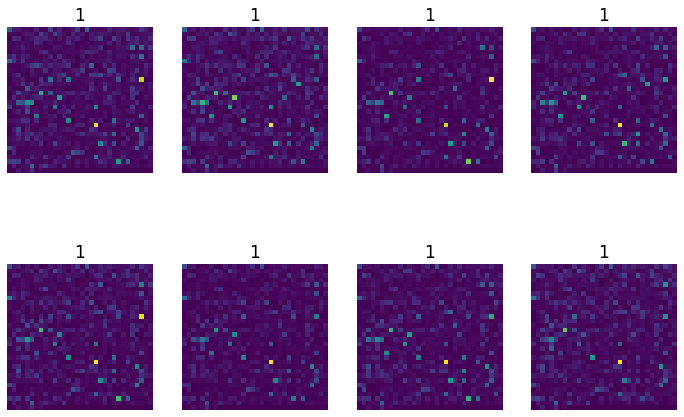

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(8):
  plt.subplot(240 + i + 1)
  plt.imshow(X[i], cmap='viridis')
  plt.title(int(y[i]), color='black', fontsize=17)
  plt.axis('off')
plt.show()

###Wypłaszczenie mikromacierzy

In [41]:
X = X.reshape((1057, 1024))
X.shape

(1057, 1024)

###PCA - 3 komponenty

In [ ]:
pca = PCA(n_components=3)

X_pca = pca.fit_transform(X)
X_pca[:5]

array([[-5.40863868, -0.79057285,  0.51199647],
       [-5.34561212, -0.74241848,  0.56464941],
       [-5.87609358, -0.80355288,  0.53588732],
       [-5.66680175, -0.75437682,  0.52393113],
       [-5.59526337, -0.79866023,  0.51273822]])

###Wyjaśniona wariancja

In [ ]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.580467,0.580467,1
1,0.106485,0.686952,2
2,0.084947,0.771899,3


In [ ]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 komponenty', width=600))
fig.show()

In [ ]:
X_pca_df = pd.DataFrame(np.c_[X_pca, y], columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_pca_df['class'] = X_pca_df['class'].astype('str')
X_pca_df.head()

,pca_1,pca_2,pca_3,class
0,-5.408639,-0.790573,0.511996,1.0
1,-5.345612,-0.742418,0.564649,1.0
2,-5.876094,-0.803553,0.535887,1.0
3,-5.666802,-0.754377,0.523931,1.0
4,-5.595263,-0.798660,0.512738,1.0


###Wizualizacja 3D głównych komponentów

In [ ]:
px.scatter_3d(X_pca_df, x='pca_1', y='pca_2', z='pca_3', color='class',
              symbol='class', opacity=0.7, size_max=10, width=950, height=700,
              title='PCA - Mikromacierze')

###PCA - 95% wariancji

In [ ]:
pca = PCA(n_components=0.95)

X_pca = pca.fit_transform(X)
X_pca[:5]

array([[-5.40863868e+00, -7.90572849e-01,  5.11996473e-01,
        -1.15513307e+00,  2.41204104e-01, -4.54137901e-01,
         1.91169402e+00, -1.00825630e-01,  1.49902383e-01,
        -1.17994713e-02],
       [-5.34561212e+00, -7.42418484e-01,  5.64649411e-01,
        -1.13551511e+00,  3.15590859e-01, -4.06532209e-01,
         1.87314763e+00, -1.68710458e-01,  2.20438682e-01,
        -2.46595134e-02],
       [-5.87609358e+00, -8.03552883e-01,  5.35887318e-01,
        -1.16448220e+00,  2.12215181e-01, -3.71043371e-01,
         1.68885796e+00, -1.58768921e-01,  4.94302385e-03,
        -3.94673109e-02],
       [-5.66680175e+00, -7.54376820e-01,  5.23931134e-01,
        -1.18548500e+00,  2.86466607e-01, -4.13019894e-01,
         1.66477971e+00, -2.23502633e-01,  1.10153655e-01,
        -2.80127855e-02],
       [-5.59526337e+00, -7.98660227e-01,  5.12738216e-01,
        -1.20662616e+00,  2.07733378e-01, -4.36683313e-01,
         1.84191608e+00, -7.86779566e-02,  1.31873605e-01,
        -2.

In [ ]:
pca.n_components_

10

In [ ]:
pca.explained_variance_ratio_

array([0.58046709, 0.10648498, 0.08494661, 0.07330049, 0.05292178,
       0.01632616, 0.01405233, 0.01014101, 0.00902377, 0.00390103])

###Wariancja wyjaśniona

In [ ]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results.head()

,explained_variance_ratio,cumulative,component
0,0.580467,0.580467,1
1,0.106485,0.686952,2
2,0.084947,0.771899,3
3,0.073300,0.845199,4
4,0.052922,0.898121,5


In [ ]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title=f'PCA - {pca.n_components_}', width=600))
fig.show()

##PCA - 99% wariancji

In [42]:
pca = PCA(n_components=0.99)

X_pca = pca.fit_transform(X)
print(pca.n_components_)

134


In [ ]:
X_pca.shape

In [43]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1

fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title=f'PCA - {pca.n_components_}', width=950))
fig.show()

In [44]:
def pca(images):
  dataset_length = images.shape[0]
  w = images.shape[1]
  h = images.shape[2]

  images = np.array(images).reshape((dataset_length, w * h))

  # 9 komponentów "trzymają" 94.7% wariancji
  pca = PCA(n_components=9)
  X = pca.fit_transform(images)

  return X.reshape(dataset_length, 3, 3)

In [45]:
X = pca(X_train)

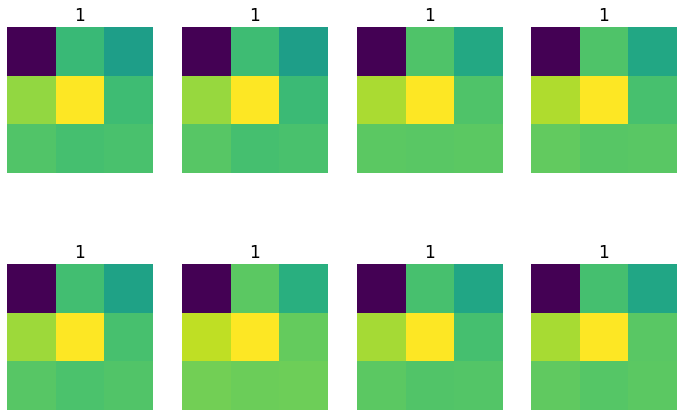

In [46]:
plt.figure(figsize=(12, 8))
for i in range(8):
  plt.subplot(240 + i + 1)
  plt.imshow(X[i], cmap='viridis')
  plt.title(int(y[i]), color='black', fontsize=17)
  plt.axis('off')
plt.show()